# Load the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'traffic.csv'  # Update this with the correct path to the dataset
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print(data.head())

# Check basic information about the dataset
print(data.info())

   event        date       country      city  \
0  click  2021-08-21  Saudi Arabia    Jeddah   
1  click  2021-08-21  Saudi Arabia    Jeddah   
2  click  2021-08-21         India  Ludhiana   
3  click  2021-08-21        France   Unknown   
4  click  2021-08-21      Maldives      Malé   

                              artist          album          track  \
0                             Tesher    Jalebi Baby    Jalebi Baby   
1                             Tesher    Jalebi Baby    Jalebi Baby   
2                      Reyanna Maria      So Pretty      So Pretty   
3  Simone & Simaria, Sebastian Yatra  No Llores Más  No Llores Más   
4                             Tesher    Jalebi Baby    Jalebi Baby   

           isrc                                linkid  
0  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
1  QZNWQ2070741  2d896d31-97b6-4869-967b-1c5fb9cd4bb8  
2  USUM72100871  23199824-9cf5-4b98-942a-34965c3b0cc2  
3  BRUM72003904  35573248-4e49-47c7-af80-08a960fa74cd  
4  QZNWQ20

# Total and Daily Pageview Events

## Code:

In [2]:
# Filter for 'pageview' events
pageview_data = data[data['event'] == 'pageview']

# Total number of pageview events
total_pageviews = pageview_data.shape[0]
print(f"Total Pageview Events: {total_pageviews}")

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Average number of pageview events per day
average_pageviews_per_day = pageview_data.groupby('date').size().mean()
print(f"Average Pageview Events per Day: {average_pageviews_per_day:.2f}")


Total Pageview Events: 142015
Average Pageview Events per Day: 20287.86


## Visualisation:

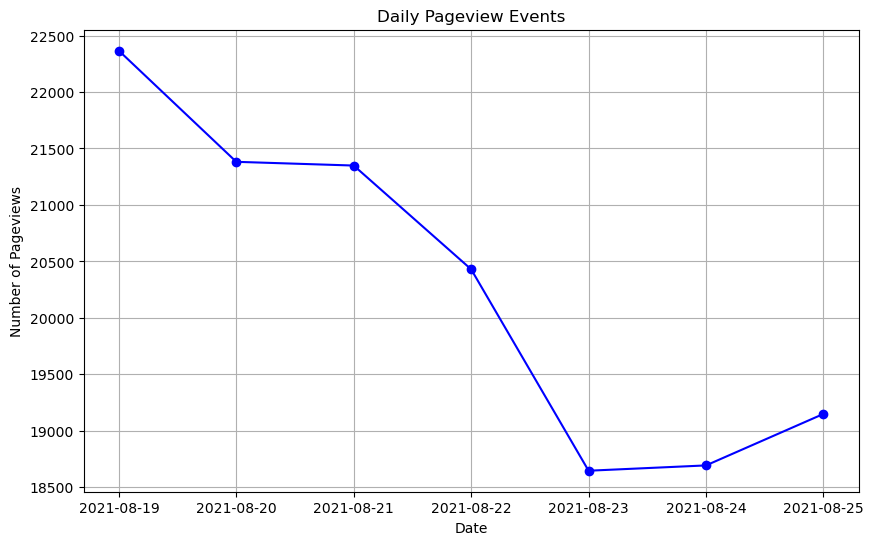

In [7]:
import matplotlib.pyplot as plt

# Daily pageview events
daily_pageviews = pageview_data.groupby('date').size()

# Line plot of daily pageviews
plt.figure(figsize=(10, 6))
plt.plot(daily_pageviews.index, daily_pageviews.values, marker='o', color='b')
plt.title('Daily Pageview Events')
plt.xlabel('Date')
plt.ylabel('Number of Pageviews')
plt.grid()
plt.show()

## Analysis:

# Analysis of Other Events

## Code:

In [3]:
# Count the total number of events by type
event_counts = data['event'].value_counts()
print("Event Counts:")
print(event_counts)

# Calculate the percentage distribution of events
event_distribution = (event_counts / len(data)) * 100
print("\nEvent Distribution (Percentage):")
print(event_distribution)


Event Counts:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

Event Distribution (Percentage):
event
pageview    62.761294
click       24.629880
preview     12.608826
Name: count, dtype: float64


## Visualisation:

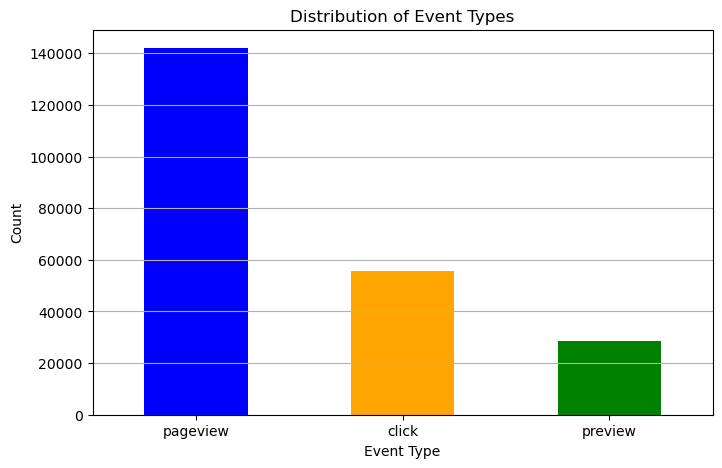

In [8]:
# Bar chart of event counts
event_counts.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(8, 5))
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Analysis:

# Geographical Distribution

## Code:

In [4]:
# Filter for 'pageview' events
pageview_data = data[data['event'] == 'pageview']

# Count the number of pageview events by country
country_pageviews = pageview_data['country'].value_counts()
print("Pageview Events by Country:")
print(country_pageviews)

# Percentage distribution of pageview events by country
country_pageview_percentage = (country_pageviews / country_pageviews.sum()) * 100
print("\nPageview Distribution by Country (Percentage):")
print(country_pageview_percentage)


Pageview Events by Country:
country
Saudi Arabia         28873
India                27286
United States        20839
France                9674
Iraq                  4897
                     ...  
Wallis and Futuna        1
Solomon Islands          1
Guinea-Bissau            1
Lesotho                  1
Saint Martin             1
Name: count, Length: 211, dtype: int64

Pageview Distribution by Country (Percentage):
country
Saudi Arabia         20.332239
India                19.214681
United States        14.674732
France                6.812388
Iraq                  3.448446
                       ...    
Wallis and Futuna     0.000704
Solomon Islands       0.000704
Guinea-Bissau         0.000704
Lesotho               0.000704
Saint Martin          0.000704
Name: count, Length: 211, dtype: float64


## Visualisation:

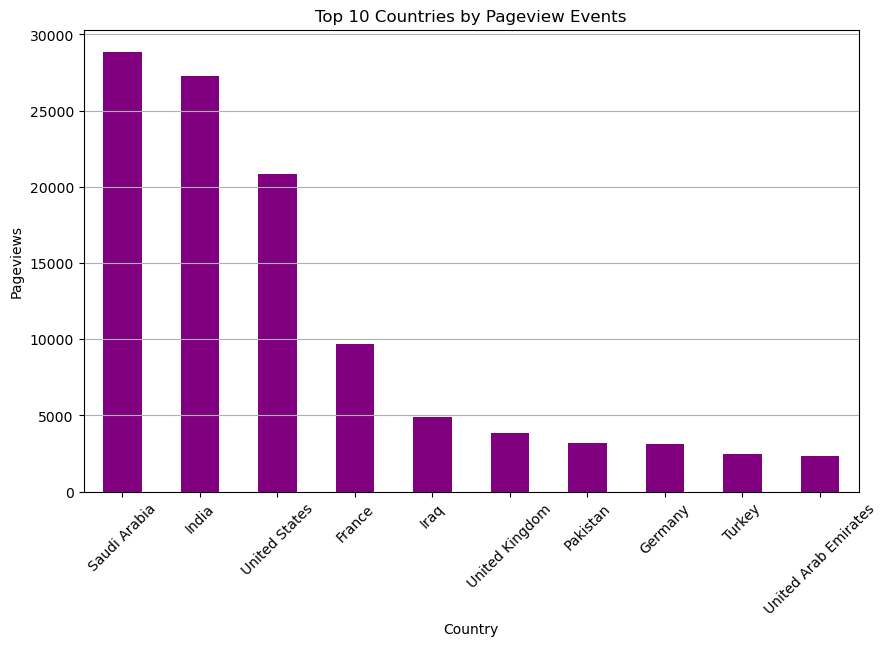

In [9]:
# Top 10 countries by pageviews
top_countries = country_pageviews.head(10)

# Bar chart for top countries
top_countries.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Countries by Pageview Events')
plt.xlabel('Country')
plt.ylabel('Pageviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Analysis:

# Click-Through Rate (CTR) Analysis

## Code:

In [5]:
# Calculate overall CTR (clicks / pageviews)
total_clicks = data[data['event'] == 'click'].shape[0]
overall_ctr = total_clicks / total_pageviews
print(f"Overall Click-Through Rate (CTR): {overall_ctr:.2%}")

# CTR by link
link_pageviews = pageview_data['linkid'].value_counts()
link_clicks = data[data['event'] == 'click']['linkid'].value_counts()

# Align both series to ensure consistent indexing
ctr_by_link = (link_clicks / link_pageviews).dropna() * 100  # Percentage
ctr_by_link = ctr_by_link.sort_values(ascending=False)
print("\nTop 5 Links by CTR:")
print(ctr_by_link.head(5))

print("\nBottom 5 Links by CTR:")
print(ctr_by_link.tail(5))


Overall Click-Through Rate (CTR): 39.24%

Top 5 Links by CTR:
linkid
c95f1fc1-fab0-4c74-b3f5-52bd3684a713    9230.0
330773a6-f22a-5c7a-a3e4-7809fe8539b9     300.0
27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7     300.0
c2d99bb2-6ea3-568c-80d3-44dc36250cbc     200.0
132c744a-d87b-5ed6-aff2-d9b8c718a4ea     200.0
Name: count, dtype: float64

Bottom 5 Links by CTR:
linkid
7cf99126-2092-4b29-bdf9-a2f8ad5500ed    12.500000
6e6c1939-9d37-450e-aec1-2af09140bc33     9.090909
6dacffe9-779d-4e9b-94dd-a3e811b2983e     9.090909
229f278b-f052-57e7-813d-15d25f226723     9.090909
899f223b-55f0-5f5a-8351-3ea64d0ce29f     9.090909
Name: count, dtype: float64


## Visualisation:

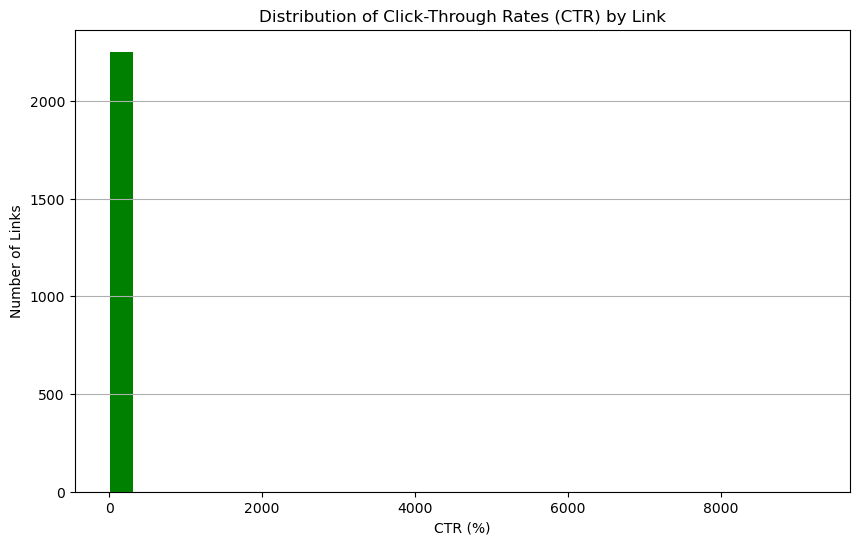

In [10]:
# Histogram of CTR by link
ctr_by_link.plot(kind='hist', bins=30, color='green', figsize=(10, 6))
plt.title('Distribution of Click-Through Rates (CTR) by Link')
plt.xlabel('CTR (%)')
plt.ylabel('Number of Links')
plt.grid(axis='y')
plt.show()


## Analysis:

# Correlation Analysis

## Code:

In [6]:
from scipy.stats import pearsonr, spearmanr

# Align pageview and click data by link ID
pageviews_by_link = pageview_data['linkid'].value_counts()
clicks_by_link = data[data['event'] == 'click']['linkid'].value_counts()

# Create a DataFrame for correlation analysis
link_metrics = pd.DataFrame({
    'pageviews': pageviews_by_link,
    'clicks': clicks_by_link
}).fillna(0)

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(link_metrics['pageviews'], link_metrics['clicks'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

# Spearman correlation (monotonic relationship)
spearman_corr, spearman_p = spearmanr(link_metrics['pageviews'], link_metrics['clicks'])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")


Pearson Correlation: 0.99, p-value: 0.0000
Spearman Correlation: 0.63, p-value: 0.0000


## Visualisation:

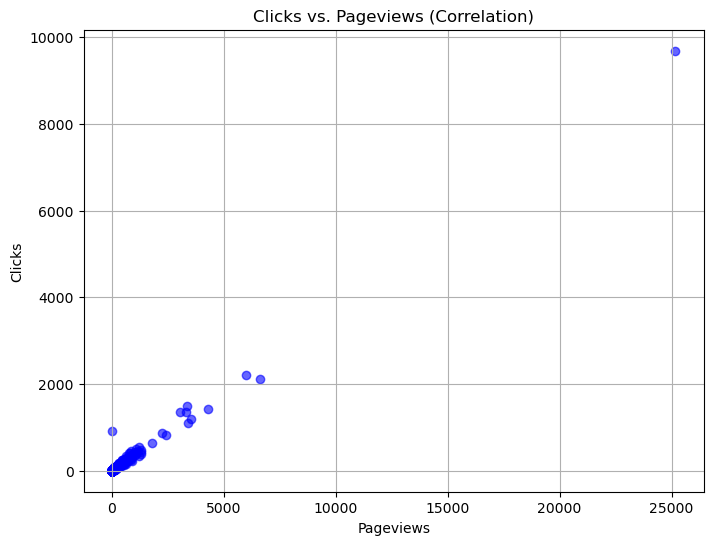

In [11]:
# Scatter plot of clicks vs. pageviews
plt.figure(figsize=(8, 6))
plt.scatter(link_metrics['pageviews'], link_metrics['clicks'], alpha=0.6, color='blue')
plt.title('Clicks vs. Pageviews (Correlation)')
plt.xlabel('Pageviews')
plt.ylabel('Clicks')
plt.grid()
plt.show()


## Analysis: